In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from scipy.stats import f_oneway

In [ ]:
df_data = pd.read_csv('/content/clean_kaggle_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_data.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dff = pd.read_csv('/content/kaggle_survey_2020_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dff.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

In [ ]:
#Filtering columns we will be performing analysis on
col = ['Q1','Q2','Q3','Q4','Q5','Q6','Q24']
df = pd.DataFrame(df_data,columns=col)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q24
0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,125000
1,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,20000
2,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,150000
3,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,80000
4,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,40000
...,...,...,...,...,...,...,...
10724,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,3000
10725,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,20000
10726,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1000
10727,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1000


In [ ]:
# Filtering the gender column with only men and women 
df = df[(df['Q2']=='Man') | (df['Q2']=='Woman')]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q24
0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,125000
1,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,20000
2,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,150000
3,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,80000
4,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,40000
...,...,...,...,...,...,...,...
10724,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,3000
10725,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,20000
10726,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1000
10727,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

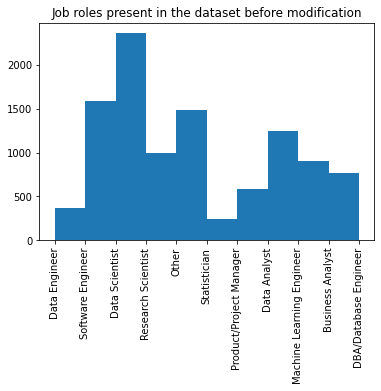

In [ ]:
#plot to explore job roles other than data science in our dataset.
plt.hist(df['Q5'])
plt.title('Job roles present in the dataset before modification')
plt.xticks(rotation = '90')

Filtering only data science job roles for further analysis:
1. Data Scientist
2. Machine Learning Engineer
3. Data Engineer
4. Data Analyst
5. Busiess Analyst
6. DBA/Database Engineer

In [ ]:
data_jobs = ('Data Scientist','Machine Learning Engineer','Data Engineer','Data Analyst','Business Analyst','DBA/Database Engineer')
df= df[df['Q5'].isin(data_jobs)]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q24
0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,125000
2,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,150000
3,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,80000
5,30-34,Man,Canada,Bachelor’s degree,Data Engineer,< 1 years,100000
8,30-34,Man,Russia,Bachelor’s degree,Data Scientist,< 1 years,1000
...,...,...,...,...,...,...,...
10719,45-49,Man,Nigeria,Master’s degree,Machine Learning Engineer,1-2 years,2000
10720,60-69,Man,Italy,Some college/university study without earning ...,Machine Learning Engineer,20+ years,70000
10721,22-24,Man,Indonesia,Bachelor’s degree,Data Scientist,1-2 years,15000
10724,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,3000


In [ ]:
df.isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q24    0
dtype: int64

**There are no null values in our dataset**

**Q.1: EDA**

Text(0, 0.5, 'Count')

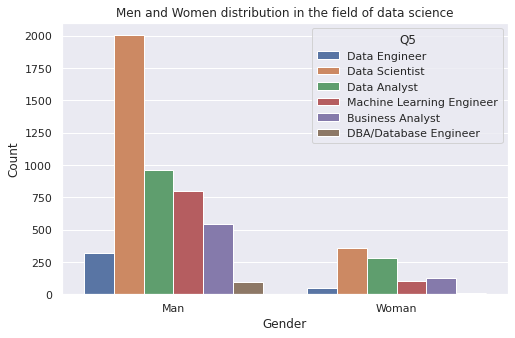

In [ ]:
#plot 1: Distribution of men and women in the field of data science and machine learning
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
plot = sns.countplot(x=df['Q2'],hue = df['Q5'])
plot.set_title('Men and Women distribution in the field of data science')
plot.set_xlabel('Gender')
plot.set_ylabel('Count')


Text(0, 0.5, 'Salary')

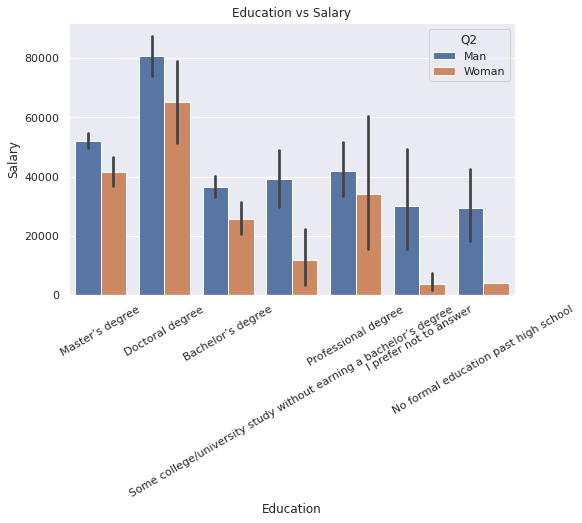

In [ ]:
#Plot 2: Comparing salary with level of education for men and women
plt.figure(figsize = (8,5))
ax = sns.barplot(data = df , x = df['Q4'],y = df['Q24'],hue = df['Q2'])
ax.set_title('Education vs Salary')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_xlabel('Education')
ax.set_ylabel('Salary')

Text(0, 0.5, 'Salary')

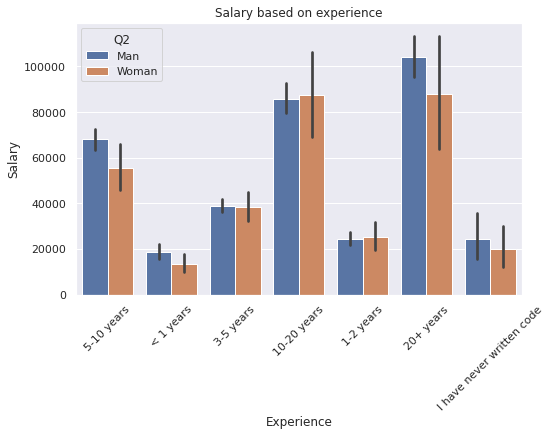

In [ ]:
# Plot 3: Comparing salary based on experience
plt.figure(figsize = (8,5))
ax = sns.barplot(x="Q6", y="Q24", hue="Q2", data=df)
ax.set_title('Salary based on experience')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')

**Q2.A: Descriptive statistics**

In [ ]:
df_stat = df[["Q2","Q24"]].groupby("Q2").describe(include=['int64','float64'])
df_stat

Q24                              ...                            
        count          mean           std  ...      50%      75%       max
Q2                                         ...                            
Man    4721.0  49752.700699  68005.390689  ...  20000.0  70000.0  500000.0
Woman   932.0  38705.472103  57927.543746  ...  10000.0  60000.0  500000.0

[2 rows x 8 columns]

Text(0.5, 1.0, 'Distribution of data')

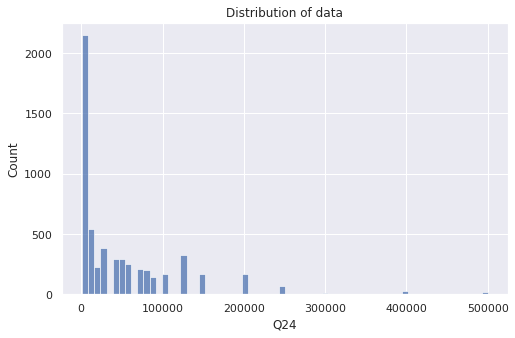

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.histplot(data = df , x = df['Q24'])
ax.set_title('Distribution of data')

Two sample t-test:

**Q2.B: Since data is not normally distributed and we can observe difference in the variance and the distribution of the two classes, it is not suitable to perform t-test on this dataset.**

**Q2.C:Bootstap**

In [ ]:
Woman_salary = df[df['Q2'] == 'Woman']['Q24']
man_salary = df[df['Q2'] == 'Man']['Q24']
b_man = []
b_woman = []
diff = 0
for i in range(1000):
  boot_man = resample(man_salary, replace=True, n_samples=len(man_salary))
  b_man.append(boot_man.mean())
  boot_woman = resample(Woman_salary, replace=True, n_samples=len(Woman_salary))
  b_woman.append(boot_woman.mean())
b_man = np.array(b_man)
b_woman = np.array(b_woman)
diff = b_man - b_woman

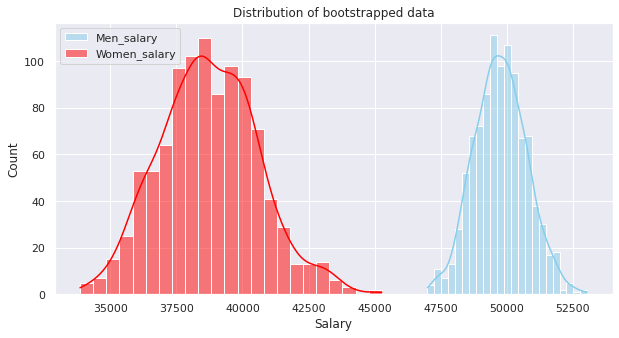

In [ ]:
#plot for bootstrapped data
plt.figure(figsize=(10,5))
ax = sns.histplot(data=b_man, color="skyblue", label="Men_salary", kde=True)
ax = sns.histplot(data=b_woman, color="red", label="Women_salary", kde=True)
ax.set_title('Distribution of bootstrapped data')
ax.set_xlabel('Salary')
plt.legend()
sns.set(style="darkgrid")

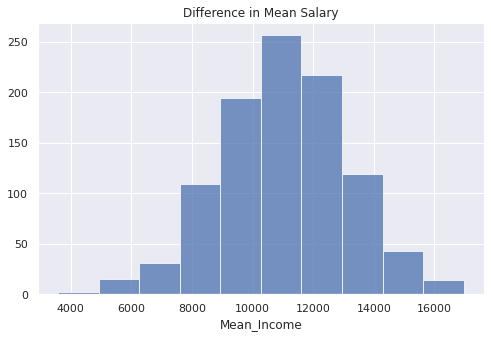

In [ ]:
#plot for difference in the means
plt.figure(figsize=(8,5))
plt.hist(diff, bins=10, alpha=0.75);
plt.title("Difference in Mean Salary")
plt.xlabel("Mean_Income")
plt.show()

**Q2.D: Two sample t-test**

In [ ]:
tc, pc = stats.ttest_ind(b_woman, b_man)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -165.386  p = 0


**We can perfrom the two sample t-test on the bootstrapped data as now the data is normally distributed. Accordingly, our null hypohesis H0 dentoes that the mean salary of the two groups is same and the alternate hypothesis denotes that the mean salary is different. Since, the p-value of our test is less than 0.05 we reject the null hypothesis and conclude that the our observation is statistically significant.**

**Q:2.E: On validating the statistical significance of our observations we can conclude that the mean salary of men in the field of data science is more than that of women**

**QUESTION 3.a**

In [ ]:
df_statt = df[["Q4","Q24"]].groupby("Q4").describe(include=['int64','float64'])
df_statt = df_statt.loc[['Bachelor’s degree',"Master’s degree","Doctoral degree"]]
df_statt

Q24                ...                    
                    count          mean  ...       75%       max
Q4                                       ...                    
Bachelor’s degree  1600.0  34928.437500  ...   40000.0  500000.0
Master’s degree    2840.0  50222.535211  ...   70000.0  500000.0
Doctoral degree     691.0  78081.765557  ...  125000.0  500000.0

[3 rows x 8 columns]

**Q3.B: Since data is not normally distributed and we can observe difference in the variance and distribution of the two classes, it is not suitable to perform ANOVA test on this data.**

**Q.3B:** **Bootstrapping**

In [ ]:
Bach = df[df['Q4'] == 'Bachelor’s degree']['Q24']
Master = df[df['Q4'] == 'Master’s degree']['Q24']
Doct = df[df['Q4'] == 'Doctoral degree']['Q24']
df_Bach = df[df['Q4'] == 'Bachelor’s degree']['Q24']
df_Master = df[df['Q4'] == 'Master’s degree']['Q24']
df_Doct = df[df['Q4'] == 'Doctoral degree']['Q24']
b_Bach = []
b_Master = []
b_Doct = []
bach_mast_diff = 0
mast_doct_diff = 0
bach_doct_diff = 0
for i in range(1000):
  boot_bach = resample(df_Bach, replace=True, n_samples=len(Bach))
  b_Bach.append(boot_bach.mean())
  boot_master = resample(df_Master, replace=True, n_samples=len(Master))
  b_Master.append(boot_master.mean())
  boot_doct = resample(df_Doct, replace=True, n_samples=len(Doct))
  b_Doct.append(boot_doct.mean())
b_Bach = np.array(b_Bach)
b_Master = np.array(b_Master)
b_Doct = np.array(b_Doct)
bach_mast_diff = b_Master - b_Bach 
mast_doct_diff =  b_Doct - b_Master 
bach_doct_diff =  b_Doct - b_Bach 

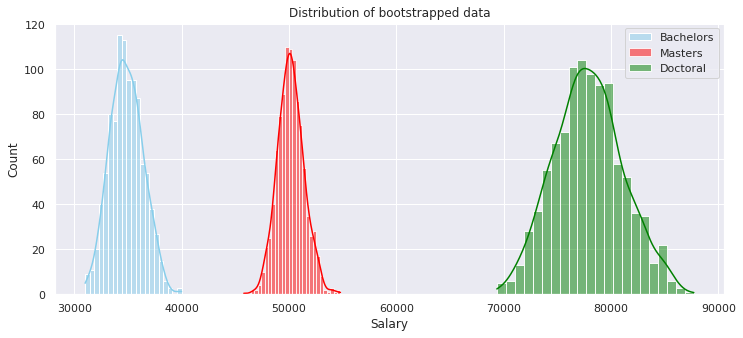

In [ ]:
#Distribution of bootstrapped data
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
ax = sns.histplot(data=b_Bach, color="skyblue", label="Bachelors", kde=True,legend=True)
ax = sns.histplot(data=b_Master, color="red", label="Masters", kde=True,legend=True)
ax = sns.histplot(data=b_Doct, color="green", label="Doctoral", kde=True,legend=True)
ax.set_title('Distribution of bootstrapped data')
ax.set_xlabel('Salary')
plt.legend()
plt.show()

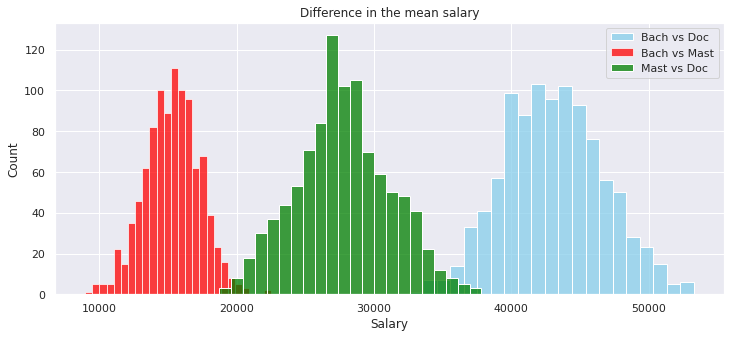

In [ ]:
#Distribution of difference in means
plt.figure(figsize=(12,5))
ax = sns.histplot(data=bach_doct_diff, color="skyblue", label="Bach vs Doc",legend = True)
ax = sns.histplot(data=bach_mast_diff, color="red", label="Bach vs Mast",legend = True)
ax = sns.histplot(data=mast_doct_diff, color="green", label="Mast vs Doc",legend = True)
ax.set_title('Difference in the mean salary')
ax.set_xlabel('Salary')
plt.legend(loc = 'upper right') 
plt.show()

**Q.3D: ANOVA test**

**Assuming equal variances to perform the ANOVA test**

In [ ]:
F, p = f_oneway(b_Bach, b_Master, b_Doct)
print('ANOVA result: F =', F, 'P = ', p)

ANOVA result: F = 99953.0161950628 P =  0.0


**We can perfrom the ANOVA test on the bootstrapped data as now the data is normally distributed. Accordingly, our null hypohesis H0 dentoes that the mean salary of the three groups is same and the alternate hypothesis denotes that the mean salary is different. Since, the p-value of our test is less than 0.05 we reject the null hypothesis and conclude that the our observation is statistically significant.**

**Q:3.E: On validating the statistical significance of our observations we can conclude that professionals with doctoral degree fall into higher income groups as compared to those with a bachelors or a masters degree**